# Skeleton for HW3
Rename this file and place your code here.

**Note: If a cell begins with HW: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW. This also clearly delineates the sections for me.**

#### HW: Preamble: load all needed packages in the cell below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.integrate import dblquad
from scipy.integrate import tplquad

import time

### Part 1: Data Visualization 

#### HW 1-1: Plotting functions

* Create a plot containing 3 horizontal subplots. The plots should show $x$ from $[0,\frac{3\pi}{2}]$ versus the real and complex parts of $e^{-ix^2}$ in the first two subplots, and the real and complex parts at the same $x$ versus each other in the 3rd subplot.  Add a title to the overall plot and each subplot.  Make 2 other changes that you think make it looks nicer (explicitly state what those changes are).

According to [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula), $e^{ix} = cos(x) + i*sin(x)$.

Thus, the real part of $e^{-ix^2}$ would be $cos(-x^2)$ and the imaginary part would be $sin(-x^2)$.

-  Change #1 - seaborn colors
- Change #2 - used LaTex for figure labelling
- Change #3 - added custom x ticks and labels

https://www.britannica.com/science/Eulers-formula

In [2]:
# generate the data
x = np.linspace(0, 3 * np.pi / 2, 100)
y1 = np.cos(-x**2) # real 
y2 = np.sin(-x**2) # complex

Text(0.5, 1.0, 'complex parts of $e^{-ix^2}$ versus real parts of $e^{-ix^2}$')

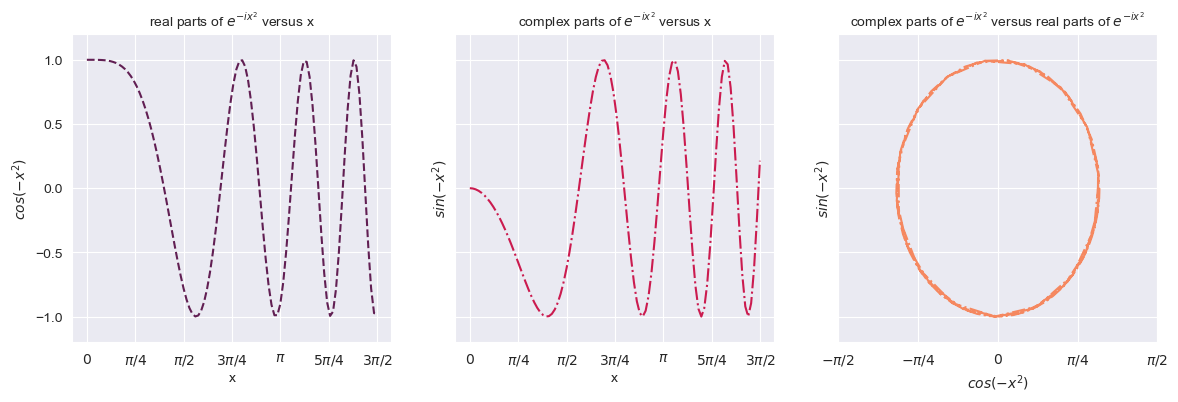

In [3]:
sns.set_style("darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 4))

colors=sns.color_palette("rocket",3)
ylim = (np.min(y1)*1.2, np.max(y1)*1.2)  # Replace with your desired y-limits for y1
xticks = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2]
xticklabels = [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$']

ax1.plot(x,y1, linestyle='--', color=colors[0])
ax1.set_ylim(ylim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_title('real parts of $e^{-ix^2}$ versus x', size=10)
ax1.set_xlabel('x')
ax1.set_ylabel('$cos(-x^2)$')

ax2.plot(x,y2, linestyle='-.', color=colors[1])
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_title('complex parts of $e^{-ix^2}$ versus x', size=10)
ax2.set_xlabel('x')
ax2.set_ylabel('$sin(-x^2)$')

ax3.plot(y1,y2, linestyle='-.', color=colors[2])

xticks1 = [-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2]
xticklabels1 = [r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$', r'$\pi/2$']
ax3.set_xticks(xticks1)
ax3.set_xticklabels(xticklabels1)
ax3.set_xlabel('$cos(-x^2)$')
ax3.set_ylabel('$sin(-x^2)$')

ax3.set_xlim(-np.pi/2, np.pi/2)
ax3.set_title('complex parts of $e^{-ix^2}$ versus real parts of $e^{-ix^2}$', size=10)

#### HW 1-2: Plotting x-y data

* Download the new Stockholm temperature data plot, `stockholm_daily_temp_obs_1859_2012.csv`, linked from the assignment.  Note that it is a comma-separated field, so you want to load it using the option `delimiter=','`.  The columns are year, month, day, temperature in the morning, temperature at noon, temperature in the evening, maximum temperature, and minimum temperature. 
* You can do the following on different sequential plots, or just make all the the changes in a single plot at the end (if you have done all the things, I will see them all in the final plot)!
1. Create a scatter plot that gives the noon temperature in black in 1950 from 1952 for each day over the three years, with two dotted red and blue lines for the max and min temperatures for each day, respectively.
2. Next, create a legend for the three plots, and put it in the lower right of the figure.  Add a title that is larger than the rest of the text. 
3. Next, add semitransparent shading between the min and max temperatures each day. 
4. Next, change the labels on the x-axis to be by month, and not just day in the year, and make sure the y-axis includes labeling temperature in $C^\circ$ with the proper formatting. Rotate the axes and make the figure wider so the months labels can be seen.
5. Finally, add text with an arrow identifying the lowest and highest temperatures on the graph.

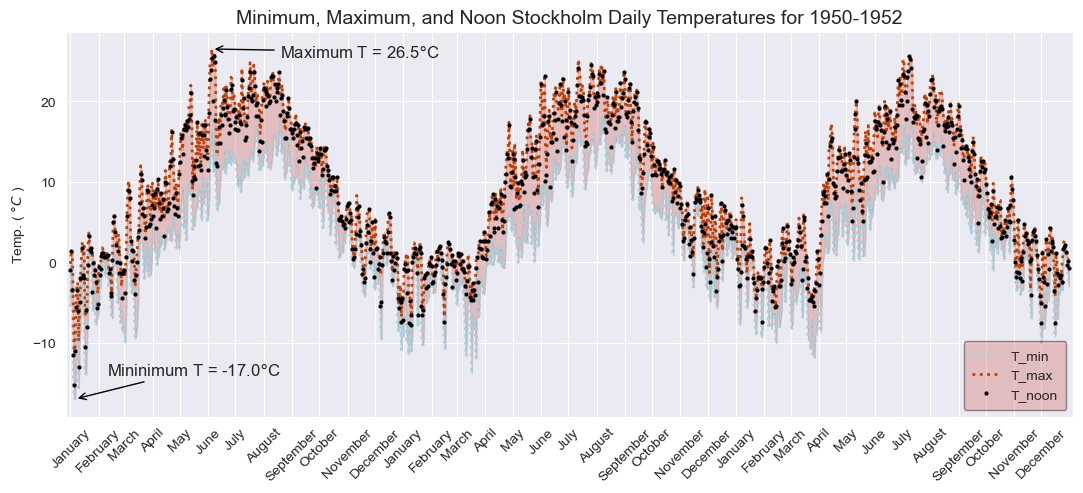

In [4]:
filename = r'stockholm_daily_temp_obs_1859_2012.csv'
df = pd.read_csv(filename, delimiter=',') # I think by default pd.read_csv uses delimiter=',' so it wouldn't be necessary to specify this

### extract tnoon data between for the years 1950-1952
tnoon_data = df.loc[(df['#year'] >= 1950) & (df['#year'] <= 1952), ['#year', 'month', 'tnoon', 'tmin', 'tmax']]

### generate a scatter plot with the index as x-values and "tnoon" as y-values
sns.set_style('darkgrid')
fig = plt.figure(2, figsize=(13, 5))
plt.plot(tnoon_data.index, tnoon_data['tmin'], linestyle='dotted', color='#a2d2df', label='T_min', linewidth=2)
plt.plot(tnoon_data.index, tnoon_data['tmax'], linestyle='dotted', color='#C04000', label='T_max', linewidth=2)
plt.plot(tnoon_data.index, tnoon_data['tnoon'], linestyle='None', marker="o", markersize=2, color='k', label='T_noon') # linestyle???
plt.xlim(tnoon_data.index[0]-5,tnoon_data.index[-1]+5)

### add a legend in the lower right corner of the plot
plt.legend(fontsize=10, loc='lower right', framealpha=0.4, facecolor='#d87a73', edgecolor='k', borderpad=0.6, ) 

### add a title that is larger than the rest of the text
plt.title('Minimum, Maximum, and Noon Stockholm Daily Temperatures for 1950-1952', fontsize=14)

### add semitransparent shading b/w the min and max temperatures deach dat
plt.fill_between(tnoon_data.index, tnoon_data['tmin'], tnoon_data['tmax'], alpha=0.4, color='#d87a73')

### change the labels on the x-axis to be by month, and not just the day in the  year
# ChatGPT credit - see description below - used to find the indices where the month changes, store that in a new list to use as the xlabels #
month_changes = []
current_value = None
for index in tnoon_data['month'].index:
    value = tnoon_data['month'][index]
    if value != current_value:
        month_changes.append(index)
        current_value = value
        
xlabels = ['January','February','March','April','May','June','July','August','September','October','November','December']*3
plt.xticks(month_changes,xlabels)

### add a y-axis label to be temp in degC with proper formating (Temp. ($\degree C$))
plt.ylabel('Temp. ( $\degree C$ )', fontsize=10)

### rotate the axes and make the figure wider so the months labels can be seen
plt.xticks(rotation=45)

### add text with an arrow identifying the lowest and highest temperatures on the graph
overall_tmin = tnoon_data['tmin'].min()
overall_tmax = tnoon_data['tmax'].max()
index_overall_tmin = tnoon_data.index[tnoon_data['tmin'] == overall_tmin][0]
index_overall_tmax = tnoon_data.index[tnoon_data['tmax'] == overall_tmax][0]
plt.annotate(f'Mininimum T = {overall_tmin}$\degree$C',xy=(index_overall_tmin,overall_tmin),xycoords='data',xytext=(index_overall_tmin+35,overall_tmin+3),fontsize=12,arrowprops=dict(arrowstyle="->",color='k'))
plt.annotate(f'Maximum T = {overall_tmax}$\degree$C',xy=(index_overall_tmax,overall_tmax),xycoords='data',xytext=(index_overall_tmax+75,overall_tmax-1),fontsize=12,arrowprops=dict(arrowstyle="->",color='k'))

plt.grid(True)
plt.show()

Use of ChatGPT to help me write the loop that finds the indices where the month data changes and stores that to use as the xticks locations:
- Asked the question: I have a series and I want to make a loop that goes through the data in one of the columns and stores the index where the data changes. for instance, if it was [0,0,1,1,1,1,1,2,2] i would want to store the indices where there's the first instance of 0 (index 0), 1 (index 2), and 2 (index 7).
- ChatGPT provided this code, which I adapted to fit what I wanted to do for this problem.

  ```
      import pandas as pd

      # Create a sample Series
      data_series = pd.Series([0, 0, 1, 1, 1, 1, 1, 2, 2])

      # Initialize an empty list to store the indices where data changes
      change_indices = []

      # Initialize a variable to keep track of the current value
      current_value = None

      # Iterate through the Series and store the indices where data changes
      for index, value in data_series.iteritems():
          if value != current_value:
              change_indices.append(index)
              current_value = value

      # Print the list of change indices relative to the excerpt
        print(change_indices)

  ```

#### HW 1-3: Plotting higher dimensional data in 2D 
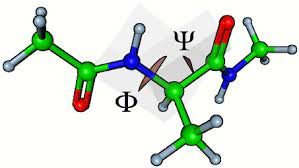

* Use the `ALA2fes.dat` (also included in the assignment) to create a contour plot of the alanine dipeptide free energy as a functions of $\Phi$ vs $\Psi$ torsion angles . $\Phi$ vs $\Psi$ (in columns 1 and 2) go from $[-\pi,\pi)$, and the free energy is the 3rd column.  Observe the patterns in $\Phi$ and $\Psi$; they are not just monotonically increasing. 
* Use the data to create a quiver plot of the gradient $\nabla G$ of the free energy at each point.  The 4th and 5th columns are the derivative of the free energy in the $\Phi$ and $\Psi$ respectively, i.e. $\nabla G = \left(\frac{\partial G}{\partial \Phi},\frac{\partial G}{\partial \Psi}\right)$. (Note: Google "plotting vector fields" in matplotlib if you want more tips).


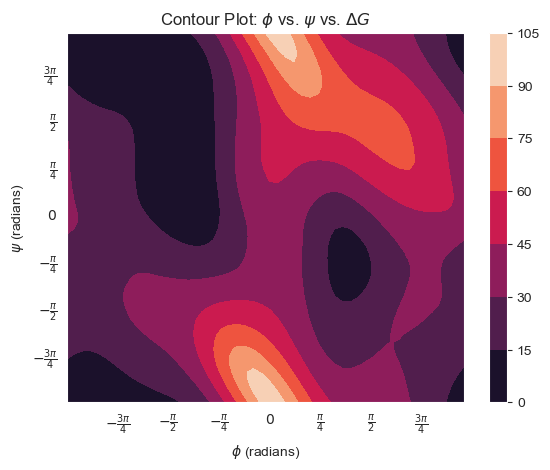

In [5]:
data = np.genfromtxt('ALA2fes.dat')

phi = data[:,0]         # first column has phi data
psi = data[:,1]         # second column has psi data
free_energy = data[:,2] # third column has free energy

phi_values = np.unique(phi) # find all unique phi values
psi_values = np.unique(psi) # find all unique psi values
xg, yg = np.meshgrid(phi_values, psi_values) # lay the phi and psi values on top of each other to unique define each lattice point

zg = free_energy.reshape(np.shape(xg)) # reshape the free energy data to be a 2D 50 x 50 array instead of a 1D 2500 x 1 array

fig,ax = plt.subplots()

xmin, xmax = np.min(phi), np.max(phi)
ymin, ymax = np.min(psi), np.max(psi)
# x_ticks = [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
# x_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']
# y_ticks = [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
# y_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

x_ticks = [-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4]
x_labels = [r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$']
y_ticks = [-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4]
y_labels = [r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$']

cp = ax.contourf(xg, yg, zg, cmap='rocket', extent = [xmin, xmax, ymin, ymax])

ax.set_xlim(xmin, xmax)
ax.set_xticks(x_ticks, x_labels)
ax.set_xlabel(r'$\phi$'+' (radians)')

ax.set_ylim(ymin, ymax)
ax.set_yticks(y_ticks, y_labels)
ax.set_ylabel(r'$\psi$'+' (radians)')

fig.colorbar(cp) # Add a colorbar to a plot

ax.set_title('Contour Plot: ' + r'$\phi$' + ' vs. ' + r'$\psi$' + ' vs. ' + r'$\Delta G$')

plt.show()

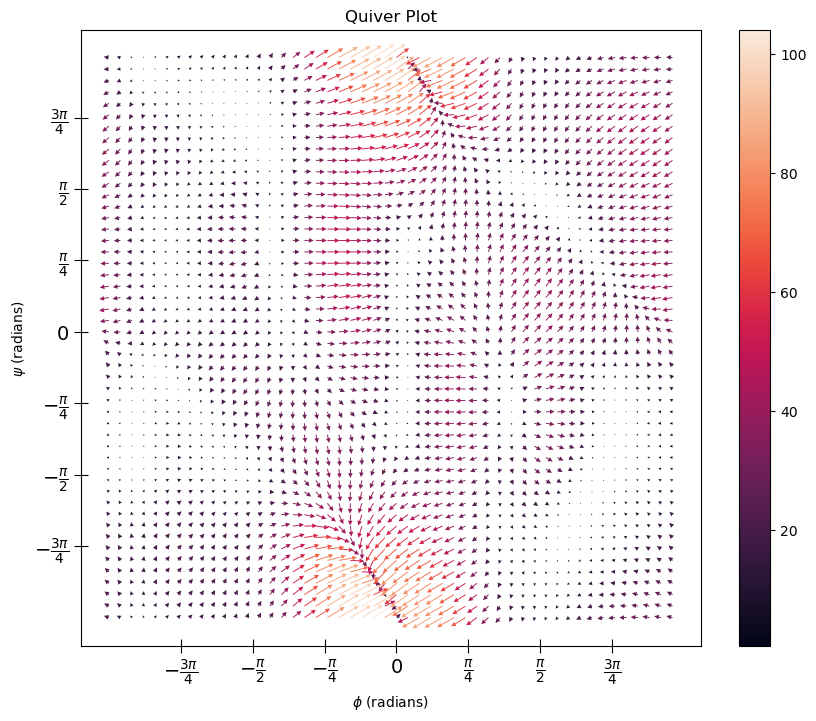

In [6]:
dGdphi = data[:,3]
dGdpsi = data[:,4]

M = np.sqrt(dGdphi*dGdphi + dGdpsi*dGdpsi)

sns.reset_defaults()

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('w') 
plt.colorbar(ax.quiver(phi, psi, dGdphi, dGdpsi, M, cmap='rocket', scale=2500, width=0.0015, headwidth=5, headlength=5, headaxislength=5))


x_ticks = [-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4]
x_labels = [r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$']
y_ticks = [-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4]
y_labels = [r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$']

# ax.set_xlim(xmin, xmax)
ax.set_xticks(x_ticks, x_labels)
ax.set_xlabel(r'$\phi$'+' (radians)')

# ax.set_ylim(ymin, ymax)
ax.set_yticks(y_ticks, y_labels)
ax.set_ylabel(r'$\psi$'+' (radians)')

ax.tick_params(labelsize=14, direction='inout', length=10)

ax.set_title('Quiver Plot')

plt.show()

Idea for arrow coloring based on magnitude of partial derivatives - [Stack Overflow](https://stackoverflow.com/questions/37706467/color-mapping-a-3d-quiver-function)

### Part 2: Numerical integration and `scipy`

**HW 2-1**: Compute the total amount of component A in the ellipsoidal volume defined by $\frac{x^2}{9}+\frac{y^2}{16}+\frac{z^2}{25}=1$, where the concentration is a function of the positions $C(x,y,z) = 10e^{-x^2-2y^2-3z^2}$, using scipy numerical integration functions. Hint: it's easier if you consider just one of the eight equal octants and multiply by 8. 

In [7]:
# help(dblquad)
# help(tplquad)

Since C is a function of 3 variables, will need to do a triple integral - use tplquad() instead of dblquad()

For ellipsoidal volume:
- Evaluating graphically, can see that x-limits would be from 0 to 3
- Y-limits would be from 0 to $\sqrt{16*(1-\frac{x^2}{9})}$
- Z-limits would be from 0 to $\sqrt{25*(1-\frac{x^2}{9}-\frac{y^2}{16})}$

In [8]:
def conc(x,y,z):
    return 10*np.exp(-x**2-2*y**2-3*z**2)

val, abserr = tplquad(lambda x,y,z: conc(x,y,z), 0, 3, 0, lambda x: np.sqrt(16*(1-x**2/9)), 0, lambda x,y: np.sqrt(25*(1-x**2/9-y**2/16)))

print(f'The total amount of component A in the ellipsoidal volume with the concentration function described above is {val*8:.3f}')

The total amount of component A in the ellipsoidal volume with the concentration function described above is 22.733


**HW 2-2**: Solve the following initial value problem:

$\frac{dx}{dt} = (Y_2(x))^{2}-\sin(x) + 5\cos(5t)$

Where $Y_2(x)$ is the Bessel function of the second kind with parameter 2, with initial conditions $x(-3)=2$, up to $t=20$. Plot the solution $x(t)$. 

In [9]:
from scipy.integrate import solve_ivp
from scipy.special import yv

In [10]:
def func(t,x):
    # return (yv(x,2))**2-np.sin(x)-5*np.cos(5*t)
    return (yv(2,x))**2-np.sin(x)+5*np.cos(5*t)

# solve the ODE problem
results = solve_ivp(func, [-3,20], [2])

print(results)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [-3.000e+00 -2.935e+00 ...  1.989e+01  2.000e+01]
        y: [[ 2.000e+00  1.761e+00 ...  1.185e+00  1.581e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 998
     njev: 0
      nlu: 0


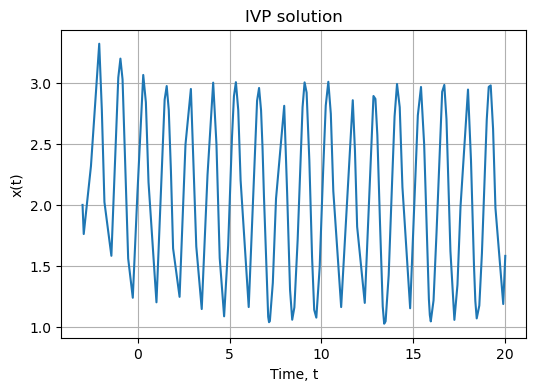

In [11]:
sns.reset_defaults()
plt.figure(figsize=(6, 4))
plt.plot(results.t, results.y[0])
plt.xlabel('Time, t')
plt.ylabel('x(t)')
plt.title('IVP solution')
plt.grid(True)
plt.show()

**HW 2-3**. Consider the system of differential equations with initial conditions x = 1, y = 1 at t = 0.
\begin{eqnarray*}
\frac{dx}{dt} &=& -2x + 3y\\
\frac{dy}{dt} &=& 5000x - 8000y
\end{eqnarray*}

These are a stiff set of differential equations, which require somewhat special treatment to be solved correctly, as time intervals that are too long will lead the numerical solutions to blow up, or for adaptive methods, will take a long time.

At a fixed error tolerance, use `scipy.integrate.solve_ivp` with different methods and report how difficult they found the problem in terms of time required, number of steps taken, and number of function evaluations required. Plot the solutions ($x(t)$,$y(t)$) with all methods. Comment on any interesting points found. Loop over the methods to reduce the amount of duplicated code you generate.


In [12]:
def f(t,x):
    '''the derivative of the differential equation'''
   
    dy = np.zeros(2)
    
    # x[0] = x and x[1] = y
    # dy[0] = dx/dt and dy[1] = dy/dt
    
    dy[0] = -2*x[0]+3*x[1]
    dy[1] = 5000*x[1]-8000*x[1]
    
    return dy

In [13]:
trange = [0,50] 
x_init = [1,1] 

In [14]:
methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']

stepsTaken = []
nfev = []
tSol = []
xSol = []
ySol = []
runTime = []

for method in methods:
    startTime = time.time()
    
    results = solve_ivp(f, trange, x_init, method=method, rtol=10**-8)
    
    stopTime = time.time()
    totTime = stopTime - startTime
    runTime.append(totTime)

    stepsTaken.append(len(results.t) - 1) # subtract 1 b/c the first time point will just be the initial condition (not actually a step)
    nfev.append(results.nfev)
    tSol.append(results.t)
    xSol.append(results.y[0])
    ySol.append(results.y[1])

In [15]:
i = 0

while i < len(methods):
    print(f'The {methods[i]} method took {runTime[i]:.6f} seconds to run, requiring {stepsTaken[i]} steps and {nfev[i]} function evaluations.')
    i += 1

The RK45 method took 2.603037 seconds to run, requiring 45325 steps and 317282 function evaluations.
The RK23 method took 2.088658 seconds to run, requiring 59773 steps and 179348 function evaluations.
The DOP853 method took 1.872872 seconds to run, requiring 23468 steps and 281690 function evaluations.
The Radau method took 0.028033 seconds to run, requiring 86 steps and 610 function evaluations.
The BDF method took 0.018641 seconds to run, requiring 168 steps and 338 function evaluations.
The LSODA method took 0.003916 seconds to run, requiring 158 steps and 269 function evaluations.


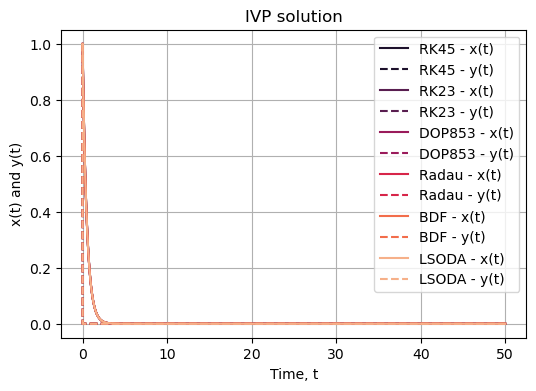

In [16]:
sns.reset_defaults()

plt.figure(figsize=(6, 4))

colors=sns.color_palette("rocket",2*len(methods))

i = 0
while i < len(methods):
    plt.plot(tSol[i], xSol[i], label=f'{methods[i]} - x(t)', linestyle='-', color=colors[i*2])
    plt.plot(tSol[i], ySol[i], label=f'{methods[i]} - y(t)', linestyle='--', color=colors[i*2])
    i += 1
    
plt.xlabel('Time, t')
plt.ylabel('x(t) and y(t)')
plt.title('IVP solution')
plt.legend()
plt.grid(True)

plt.show()

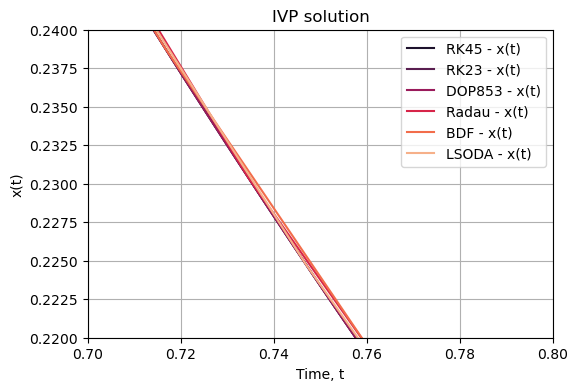

In [17]:
sns.reset_defaults()

plt.figure(figsize=(6, 4))

# colors=sns.color_palette("rocket",2*len(methods))

i = 0
while i < len(methods):
    plt.plot(tSol[i], xSol[i], label=f'{methods[i]} - x(t)', linestyle='-', color=colors[i*2])
    i += 1

plt.xlabel('Time, t')
plt.ylabel('x(t)')
plt.title('IVP solution')
plt.legend()
plt.ylim(0.22,0.24)
plt.xlim(0.7,0.8)
plt.grid(True)

plt.show()

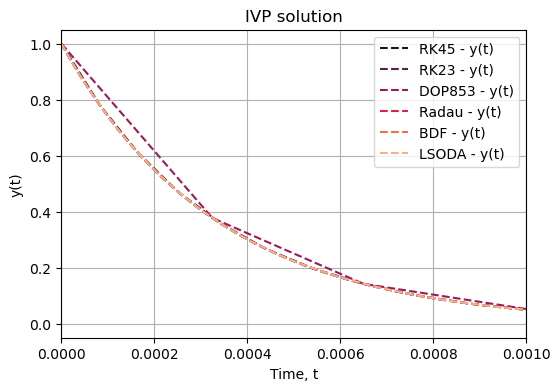

In [18]:
sns.reset_defaults()

plt.figure(figsize=(6, 4))

# colors=sns.color_palette("rocket",2*len(methods))

i = 0
while i < len(methods):
    plt.plot(tSol[i], ySol[i], label=f'{methods[i]} - y(t)', linestyle='--', color=colors[i*2])
    i += 1

plt.xlabel('Time, t')
plt.ylabel('y(t)')
plt.title('IVP solution')
plt.legend()
plt.xlim(0,0.001)
plt.grid(True)

plt.show()

### Part 3: Learning new stuff 
**HW 3-1**: Continue to play around Python test out a range of functionality that wasn’t covered in class, and demonstrate it here. Write in a Markdown cell or a couple of paragraphs about what you did, and give some examples of code cells below the cool things you found.

- For this exploration part of the assignment, I decided to continue previous weeks' exploration of the [seaborn Python package](https://seaborn.pydata.org/tutorial.html).
- Last week, I finished the "figure aesthetics tutorial" user tutorial. 
- For this week's "learning new stuff" assignment I decided to complete the ["visualizing distributions of data" tutorial](https://https://seaborn.pydata.org/tutorial/distributions.html) since I hopt to eventually use seaborn to better plot particle size distribution data. 
- Next week, I hope to use seaborn to make new plots of problems addressed in this course and/or try using seaborn to graph some data that I have generated as part of one of my independent studies. As I mentiond last week, I generate particle size distributions and would like to explore seaborn's capabilities to plot histograms to generate visually appealing plots of my data using seaborn. And hopefully I can incorporate those figures into the paper I will turn in at the end of my report for that independent study!

- seaborn has a distributions model with axes-level functions `histplot()`, `kdeplot()`, `ecdfplot()`, `rugplot()`
- These are grouped w/in figure-level `displot()`, `jointplot()`, and `pairplot()` functions
- The default approach in `displot()` is to graph the data as a histogram - it uses the same underlying code as `histplot()`

In [19]:
plt.clf()
sns.reset_defaults()
sns.set_theme(style='darkgrid')
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- By default, `displot()` and `histplot()` choose a default bin size which is dependent on the variance in the data as well as the number of observations.
- One can directly set the bin size directly via the `bindwidth` parameter.

In [20]:
plt.clf()
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- You can also set the number of bins instead of the size of the bins.

In [21]:
sns.displot(penguins, x="flipper_length_mm", bins=20)


/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- Such an approach can fail when the data takes on a small number of integer values.
- In this case, a better visualization can be generated by passing an array of bin breaks to `bins`.
- Alternatively, you can set `discrete=True` - this approach chooses bin breaks which represent unique values in the provided dataset. Bars are centered on their corresponding value.

In [22]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [23]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [24]:
sns.displot(tips, x="size", discrete=True)

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- Categrocial data can also be plotted using histograms - discrete bins are set for the categorical values.

In [25]:
# sns.displot(tips, x="day", shrink=.8)
sns.displot(tips, x="day")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [26]:
sns.displot(tips, x="day", shrink=.8)

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- You can graph several data sets and assign a variable to `hue` to visually distinguish them by color

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- You can also change the bar plot to a "step" plot or stack each bar

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


another option is to plot bars with no overlap!

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- You can also use KDE to represent the data

In [31]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- I didn't make it all the way through this tutorial as it is quite a long one - I skipped around and focused on the sections that I felt would be most useful to me in being able to graph my particle size distribution data using `displot()`.

- Note: i'm having trouble getting the figures to display when doing "restart kernel and run all cells" you can see them, though, if you click into the very first cell in the notebook (with all the import statements), click "restart kernel and run up to selected cell", and then click down to the first of the cells in this part 3 section and run them consecuively